## Práctica 3. Visualizaciones básicas


#### **Pregunta 1**

Describe brevemente el siguiente snippet y la gráfica resultante.  ¿Qué tipo de gráfica se desplegó?  ¿Qué marcadores y qué canales visuales se están utilizando, para qué?   De las marcas graficadas, ¿Cuál parece tener el mejor consumo en ciudad y en carretera?




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`geom_smooth()` using formula = 'y ~ x'


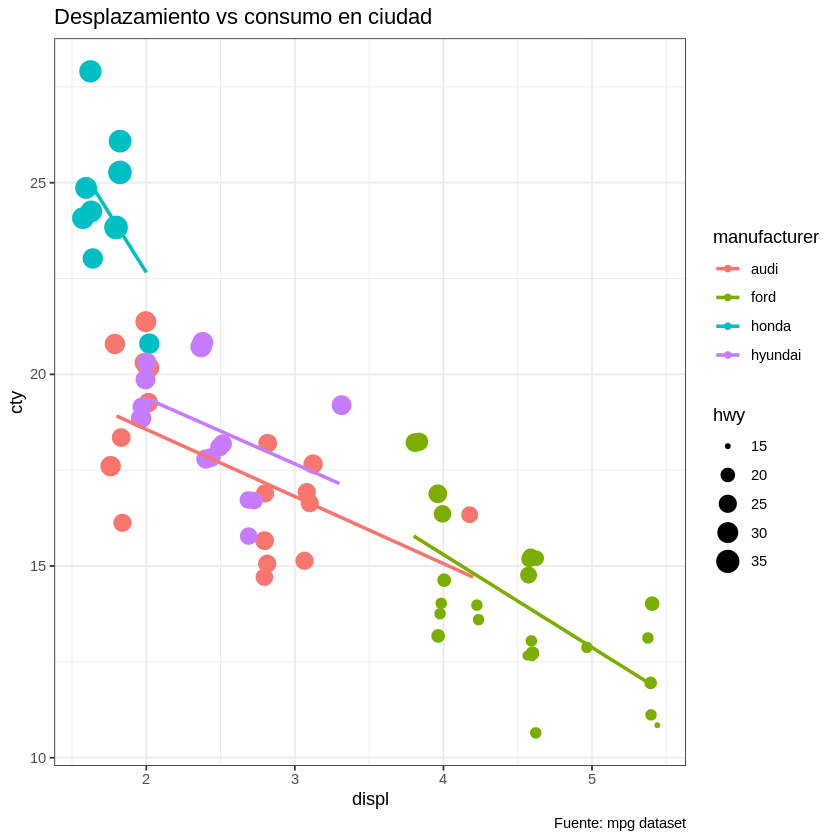

In [ ]:
library(ggplot2)
library(dplyr)

data(mpg, package="ggplot2")
mpg_select <- mpg[mpg$manufacturer %in% c("audi", "ford", "honda", "hyundai"), ]

theme_set(theme_bw())
g <- ggplot(mpg_select, aes(displ, cty)) +
  labs(title="Desplazamiento vs consumo en ciudad", caption="Fuente: mpg dataset")

g + geom_jitter(aes(col=manufacturer, size=hwy)) +
  geom_smooth(aes(col=manufacturer), method="lm", se=F)

#### **Pregunta 2.**

El siguiente snippet despliega una gráfica de población vs área para distintos condados de la región medio-oeste de Estados Unidos. Haga lo necesario para convertir la gráfica en una de burbujas en la que se pueda distinguir la densidad de población del condado (por el tamaño de la burbuja)  y el estado al que pertenecen por el canal visual más apropiado para ello.


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 15 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


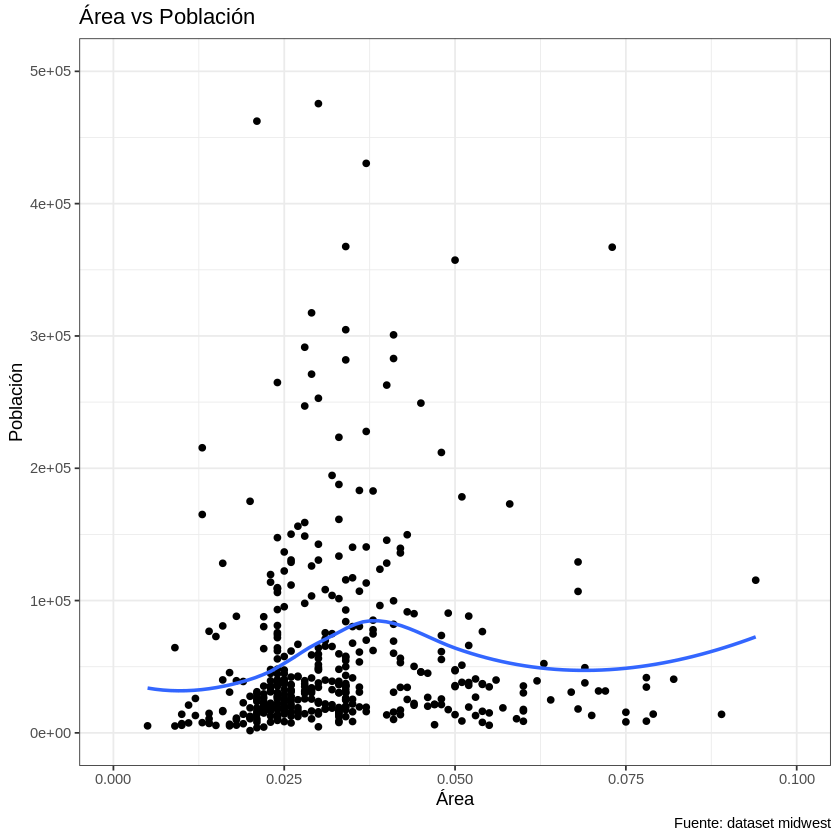

In [ ]:
gg <- ggplot(midwest, aes(x=area, y=poptotal)) +
  geom_point() +
  geom_smooth(method="loess", se=F) +
  xlim(c(0, 0.1)) +
  ylim(c(0, 500000)) +
  labs(y="Población",
       x="Área",
       title="Área vs Población",
       caption = "Fuente: dataset midwest")

plot(gg)

#### **Pregunta 3.**

Por el impacto que las presentaciones de Hans Rosling (Gapminder) han tenido, se han creado paquetes para ggplot2 que producen animaciones.  Uno de ellos es gganimate.  Ejecute el siguiente snippet y describa brevemente el resultado (sea paciente, el desplegado puede tardar algún tiempo).


In [ ]:
# Ejecutar en RStudio

install.packages("gifski")
library(gifski)
p<-ggplot(gapminder, aes(gdpPercap, lifeExp, size = pop, colour = country)) +
  geom_point(alpha = 0.7, show.legend = FALSE) +
  scale_colour_manual(values = country_colors) +
  scale_size(range = c(2, 12)) +
  scale_x_log10() +
  facet_wrap(~continent) +
  # Here comes the gganimate specific bits
  labs(title = 'Year: {frame_time}', x = 'GDP per capita', y = 'life expectancy') +
  transition_time(year) +
  ease_aes('linear')

animate(p, renderer=gifski_renderer())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("gifski"):
“installation of package ‘gifski’ had non-zero exit status”


ERROR: Error in library(gifski): there is no package called ‘gifski’


Aparentemente, ¿qué región ha evolucionado más tanto en esperanza de vida como en producto interno bruto?  



El  siguiente snippet muestra la variación de temperatura a lo largo del mes para distintos meses.  ¿Cuántos meses se graficaron? ¿Cuál es el mes en el que la temperatura varía menos? ¿Cuál el que muestra la menor temperatura?


In [ ]:
p <- ggplot(
  airquality,
  aes(Day, Temp, group = Month, color = factor(Month))
) +
  geom_line() +
  scale_color_viridis_d() +
  labs(x = "Día del mes", y = "Temperatura (Farenheit)") +
  theme(legend.position = "top")
p


Añada el código necesario para que la gráfica se despliegue animada a lo largo del eje X (de los días). Ayuda: La instrucción es `transition_reveal(Day)`.



#### **Pregunta 4.**

Explique tanto el código como la gráfica resultante al ejecutar el siguiente snippet


In [ ]:
install.packages("ggExtra")
library(ggExtra)

theme_set(theme_bw())
g <- ggplot(mpg, aes(cty, hwy)) +
  geom_count() +
  geom_smooth(method="lm", se=F)
g

ggMarginal(g, type = "histogram", fill="transparent")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





Modifique el tipo a "density" y despliegue la gráfica



#### **Pregunta 5.**

El siguiente snippet muestra un uso atractivo y muy ilustrativo de las gráficas de barras:
---

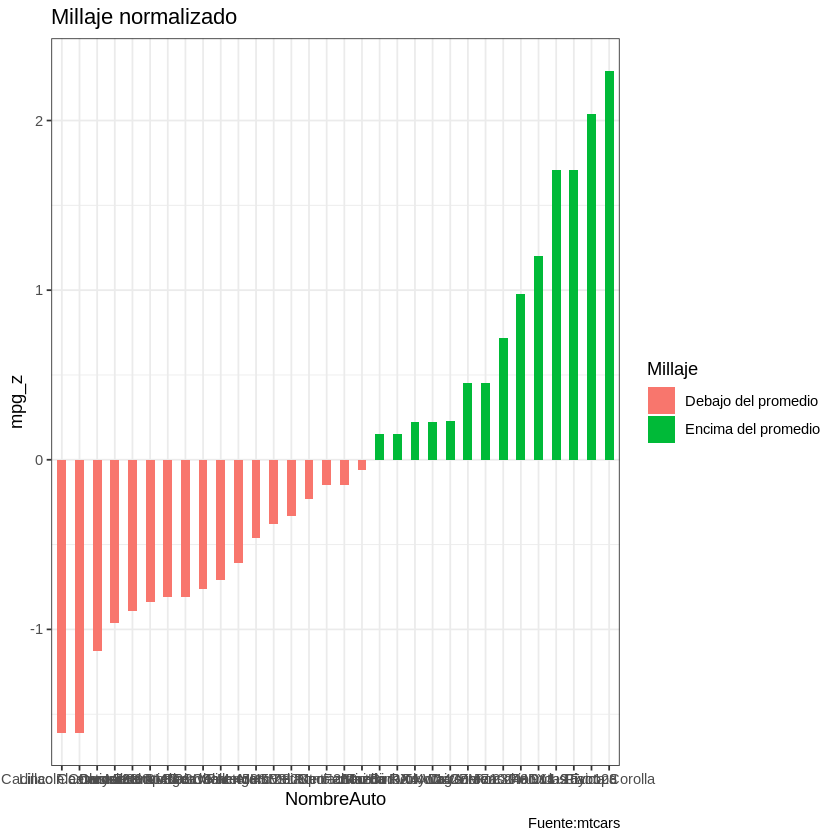

In [ ]:
# Preparación de datos
data("mtcars")  # Carga los datos
# Nueva columna para nombres de auto
mtcars$`NombreAuto` <- rownames(mtcars)
# Calcula mpg normalizado
mtcars$mpg_z <- round((mtcars$mpg - mean(mtcars$mpg))/sd(mtcars$mpg), 2)
# Asigna etiqueta para consumo normalizado
mtcars$mpg_type <- ifelse(mtcars$mpg_z < 0, "debajo", "encima")
# Ordena dataset por consumo normalizado
mtcars <- mtcars[order(mtcars$mpg_z), ]

# Convierte a factor para retener datos ordenados al graficar
mtcars$`NombreAuto` <- factor(mtcars$`NombreAuto`, levels = mtcars$`NombreAuto`)

# Gráfica de barras divergentes
ggplot(mtcars, aes(x=`NombreAuto`, y=mpg_z, label=mpg_z)) +
  geom_bar(stat='identity', aes(fill=mpg_type), width=.5)  +
  scale_fill_manual(name="Millaje",
                    labels = c("Debajo del promedio", "Encima del promedio"),
                    values = c("encima"="#00ba38", "debajo"="#f8766d")) +
  labs(title="Millaje normalizado",
       caption= "Fuente:mtcars")


La gráfica se vería mucho mejor si las barras se despliegan horizontalmente.  Haga lo necesario para que se desplieguen así.

¿Cuáles son los tres autos que parecen ser más eficientes? ¿Cuáles son los tres autos más ineficientes en consumo de gasolina?


#### **Pregunta 6.**
Hagamos un mapa de calor calendario con el precio de cierre de las acciones de Yahoo:


In [ ]:
#install.packages("plyr")
#install.packages("zoo")
library(plyr)
library(dplyr)
library(scales)
library(zoo)

df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv")
df$date <- as.Date(df$date)
df <- df[df$year >= 2012, ]

df$yearmonth <- as.yearmon(df$date)
df$yearmonthf <- factor(df$yearmonth)
df <- ddply(df,.(yearmonthf), transform, monthweek=1+week-min(week))
df <- df[, c("year", "yearmonthf", "monthf", "week", "monthweek", "weekdayf", "VIX.Close")]
head(df)
#>   year yearmonthf monthf week monthweek weekdayf VIX.Close
#> 1 2012   Jan 2012    Jan    1         1      Tue     22.97
#> 2 2012   Jan 2012    Jan    1         1      Wed     22.22

ggplot(df, aes(monthweek, weekdayf, fill = VIX.Close)) +
  geom_tile(colour = "white") +
  facet_grid(year~monthf) +
  labs(x="Semana del mes",
       y="",
       subtitle="Precio de cierre de Yahoo",
       fill="Cierre")



* ¿Para que sirve la librería zoo?
* ¿Qué hace la instrucción `df <- df[df$year >= 2012, ] ` ?
* Añada un título a la gráfica
* Haga que el rango de colores vaya de rojo (nivel bajo) a verde (nivel alto)
* ¿Qué hubo más, semanas con el precio de cierre alto, o bajo?
* ¿Cuándo se tuvo el mejor precio de cierre para Yahoo?



#### **Pregunta 7**

Para el siguiente snippet:


In [ ]:
theme_set(theme_classic())
# prep data
df <-read.csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
colnames(df) <- c("continent", "1952", "1957")
left_label <- paste(df$continent, round(df$`1952`),sep=", ")
right_label <- paste(df$continent, round(df$`1957`),sep=", ")
df$class <- ifelse((df$`1957` - df$`1952`) < 0, "red", "green")
# Plot
p <- ggplot(df) + geom_segment(aes(x=1, xend=2, y=`1952`, yend=`1957`, col=class), size=.75, show.legend=F) +
  geom_vline(xintercept=1, linetype="dashed", size=.1) +
  geom_vline(xintercept=2, linetype="dashed", size=.1) +
  scale_color_manual(labels = c("Up", "Down"), values = c("green"="#00ba38", "red"="#f8766d")) +
  # color of lines
  labs(x="", y="Promedio GdpPerCap") +
  # Axis labels
  xlim(.5, 2.5) + ylim(0,(1.1*(max(df$`1952`, df$`1957`))))
p <- p + geom_text(label=left_label, y=df$`1952`, x=rep(1, NROW(df)), hjust=1.1, size=3.5)
p <- p + geom_text(label=right_label, y=df$`1957`, x=rep(2, NROW(df)), hjust=-0.1, size=3.5)
p <- p + geom_text(label="1952", x=1, y=1.1*(max(df$`1952`, df$`1957`)), hjust=1.2, size=5)
p <- p + geom_text(label="1957", x=2, y=1.1*(max(df$`1952`, df$`1957`)), hjust=-0.1, size=5)
p + theme(panel.background = element_blank(), panel.grid = element_blank(), axis.ticks = element_blank(), axis.text.x = element_blank(), panel.border = element_blank(), plot.margin = unit(c(1,2,1,2), "cm"))
p



* ¿Qué tipo de gráfica se genera?
* ¿Qué hace la instrucción `left_label <- paste(df$continent, round(df$`1952`),sep=", ")`?
* ¿Cómo se decide el color de la línea que se imprimirá?
* ¿Qué instrucción imprime leyendas a la derecha?
* En el rango evaluado, ¿Qué continente(s) tuvo(tuvieron) una caída en su producto interno bruto per cápita?
* Haga las modificaciones necesarias para que los continentes con incremento en el GDP se grafiquen en azul acero (steelblue) y los que tengan incremento negativo, en gris



#### **Pregunta 8**

Para el dataset `mpg`, haga histogramas del desplazamiento de los cilindros del motor (`displ`) identificando las distintas clases de vehículo.

* Haga un histograma para 5, 10 y 15 clases (bins)
* Utilice la paleta `Pastel1`
* Añada un título apropiado
* Añada un subtítulo indicando el número de columnas



#### **Pregunta 9**

La lista que se carga en el siguiente dataset, corresponde a una lista de precios de departamentos en Airbnb.  


In [ ]:
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/1_OneNum.csv", header=TRUE)




(a) Haga una gráfica de densidad con color de relleno `#69b3a2`, contorno de línea negro y nivel de transparencia de 0.5.  Añada un título a la gráfica.

Como habrá observado, el rango de precios es muy grande, aunque la mayoría está por debajo de $500.00.  El siguiente segmento permite filtrar los precios menores a \$500.00

```R
library(dplyr)
filter(data,price < 500)
```

(b) Haga nuevamente la gráfica de densidad, pero sólo con los departamentos cuyos precios son menores a \$500.00.  *Utilice los pipes de R para alimentar la función filter con el dataset data y que la salida de filter alimente a la función de graficación*.



####  **Pregunta 10**

Vamos a combinar gráficas de histograma y de densidad para el dataset `mpg`.

(a) Como en la pregunta 8, empiece por hacer un histograma para el desplazamiento de los cilindros del motor.  

* En esta ocasión, no deseamos contar el número de ocurrencias sino estimar la función de densidad como histograma; por ello, el argumento "estético" será `y=..density..` (por default es `stat=count`).

* Tampoco queremos distinguir por tipo de vehículo.

* Utilice 10 bins con color negro para el contorno y blanco para el relleno

  

(b) Ahora añada una gráfica de densidad color cyan con 20% de transparencia



####  **Pregunta 11**

Con el dataset `mtcars`, haga una gráfica de violín de:

* Número de cilindros (eje X, como factor) vs millas por galón (eje Y)
* El relleno debe ser azul claro y el contorno azul
* Añada un punto azul con el valor de la mediana a la gráfica. La función es:
  * `stat_summary(fun.y=median, geom="point", size=2, color="blue")`

* Aproximadamente, ¿Cuál es la mediana de consumo de los autos con 4, 6 y 8 cilindros?



Ahora, en vez del punto con el valor de la mediana, añada dentro de la gráfica de violín, una gráfica de caja pero para que no rebase la gráfica, utilice como argumento un ancho de 0.1 (width=0.1)



¿En cuál de las gráficas se alcanzan a detectar valores extremos (outliers)?



#### **Pregunta 12**

Vamos a crear una gráfica de pie con el número de autos que hay en el dataset `mtcars` por número de cilindros.  Podría empezar por crear un dataframe exclusivamente con los datos que necesita.  Una manera MUY BÁSICA de hacerlo es la siguiente:

In [ ]:
midf <-data.frame(val = c(nrow(mtcars[mtcars$cyl==4,]),
                          nrow(mtcars[mtcars$cyl==6,]),
                          nrow(mtcars[mtcars$cyl==8,])),
                  ncyl = c("4","6","8"))
midf



Una vez creado el data frame,

1. Despliegue una gráfica de columnas (o de barras con `stat="identity"`)
2. Añada lo necesario para convertir la columna en una gráfica de pastel
3. Añada lo necesario para incluir etiquetas de los valores en la gráfica
4. Ahora convierta la gráfica anterior a una gráfica de dona.  Lo único que necesita es asignar un valor a la coordenada "x", que es proporcional al tamaño del agujero de la dona (por ejemplo x=4) y acotar el rango del eje x, por ejemplo, `xlim(0.5,5)`.


